In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
conn = sqlite3.connect('../data/spotify_kpop.db')

In [3]:
cursor = conn.cursor()
cursor.execute('SELECT name from sqlite_master where type= "table"')
cursor.fetchall()

[('spotify_kpop_train',)]

In [4]:
spotify_kpop_train_df = pd.read_sql('select * from spotify_kpop_train', conn)

In [5]:
spotify_kpop_train_df.columns

Index(['ID', 'Name', 'Popularity', 'Artist', 'Album', 'AlbumReleaseDate',
       'AlbumReleaseYear', 'AlbumTotalTracks', 'AlbumTrackNumber',
       'AlbumDiscNumber', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Vibe_Group',
       'lyric_sentiment_score', 'lyric_positive', 'lyric_neutral',
       'lyric_negative', 'lyric_question', 'lyric_exclamation',
       'lyric_background_emphasis', 'lyric_emphasis', 'lyric_word_i',
       'lyric_word_baby', 'lyric_word_know', 'lyric_word_we',
       'lyric_word_like', 'lyric_word_your', 'lyric_word_yeah',
       'lyric_word_you', 'lyric_word_want', 'lyric_word_my', 'lyric_word_me',
       'lyric_word_im', 'lyric_word_oh', 'lyric_word_love', 'lyric_word_now',
       'lyric_word_dont', 'lyric_word_up', 'lyric_word_go', 'lyric_word_no',
       'lyric_word_heart'],
      dtype='object')

In [6]:
features = ['Popularity', 
       'AlbumTotalTracks', 'AlbumTrackNumber',
       'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
       'lyric_sentiment_score', 'lyric_positive', 'lyric_neutral',
       'lyric_negative', 'lyric_question', 'lyric_exclamation',
       'lyric_background_emphasis', 'lyric_emphasis', 'lyric_word_i',
       'lyric_word_baby', 'lyric_word_know', 'lyric_word_we',
       'lyric_word_like', 'lyric_word_your', 'lyric_word_yeah',
       'lyric_word_you', 'lyric_word_want', 'lyric_word_my', 'lyric_word_me',
       'lyric_word_im', 'lyric_word_oh', 'lyric_word_love', 'lyric_word_now',
       'lyric_word_dont', 'lyric_word_up', 'lyric_word_go', 'lyric_word_no',
       'lyric_word_heart']

Popularity
                     sum_sq     df         F        PR(>F)
C(Vibe_Group)  52283.126667    2.0  93.59427  3.017718e-32
Residual       82954.270000  297.0       NaN           NaN
          Vibe_Group  Popularity
0       Donald Feelz       52.86
1         Eric Feelz       22.74
2  Eric/Donald Feelz       47.99


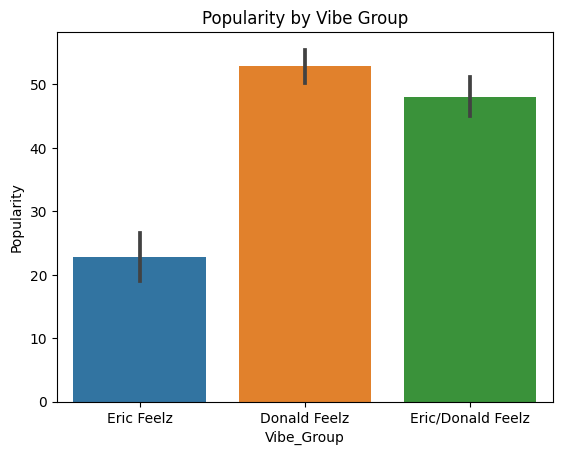


AlbumTotalTracks
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    88.886667    2.0  2.360916  0.096102
Residual       5590.910000  297.0       NaN       NaN
          Vibe_Group  AlbumTotalTracks
0       Donald Feelz              6.84
1         Eric Feelz              5.63
2  Eric/Donald Feelz              6.72


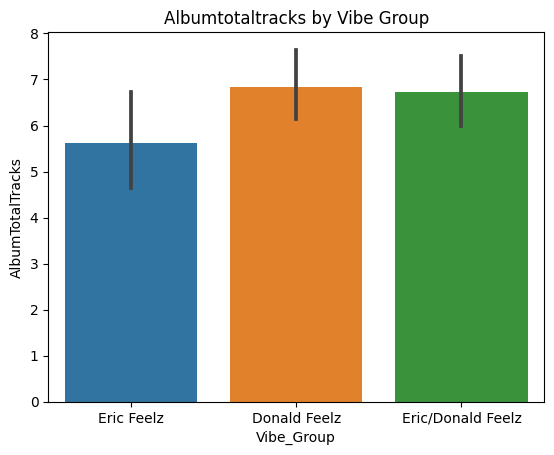


AlbumTrackNumber
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    12.486667    2.0  0.885199  0.413718
Residual       2094.750000  297.0       NaN       NaN
          Vibe_Group  AlbumTrackNumber
0       Donald Feelz              3.14
1         Eric Feelz              2.65
2  Eric/Donald Feelz              2.98


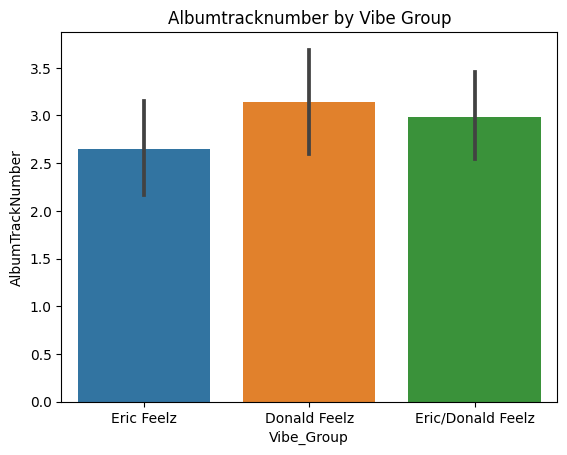


danceability
                 sum_sq     df          F    PR(>F)
C(Vibe_Group)  0.306853    2.0  12.309221  0.000007
Residual       3.701916  297.0        NaN       NaN
          Vibe_Group  danceability
0       Donald Feelz       0.65932
1         Eric Feelz       0.72124
2  Eric/Donald Feelz       0.64872


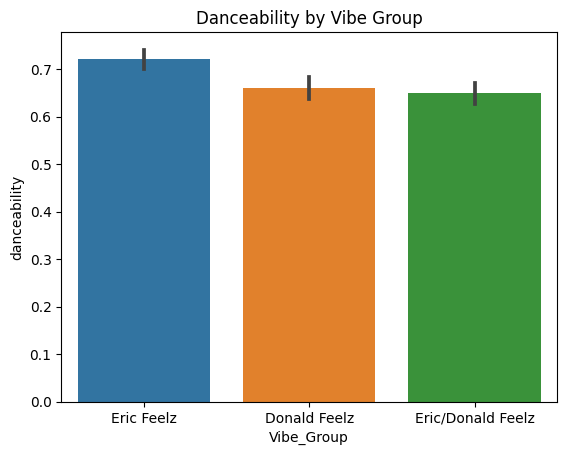


energy
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.380187    2.0  12.14807  0.000008
Residual       4.647470  297.0       NaN       NaN
          Vibe_Group   energy
0       Donald Feelz  0.84232
1         Eric Feelz  0.76759
2  Eric/Donald Feelz  0.76604


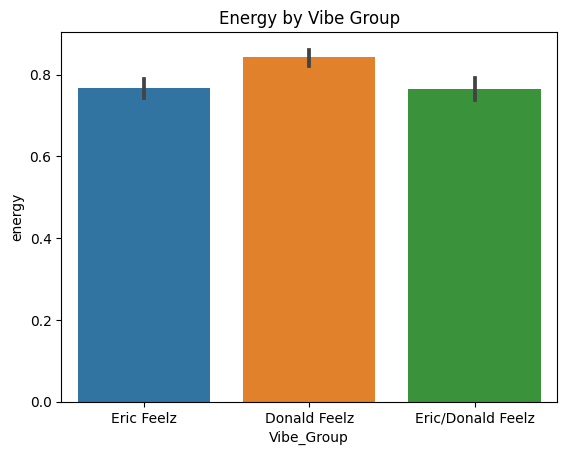


key
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    47.386667    2.0  2.035245  0.132467
Residual       3457.530000  297.0       NaN       NaN
          Vibe_Group   key
0       Donald Feelz  5.19
1         Eric Feelz  6.15
2  Eric/Donald Feelz  5.81


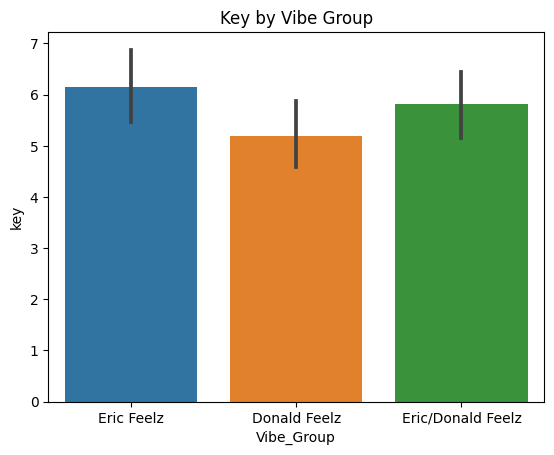


loudness
                   sum_sq     df         F    PR(>F)
C(Vibe_Group)   34.310083    2.0  7.111934  0.000962
Residual       716.408088  297.0       NaN       NaN
          Vibe_Group  loudness
0       Donald Feelz   -3.4700
1         Eric Feelz   -4.2678
2  Eric/Donald Feelz   -3.6758


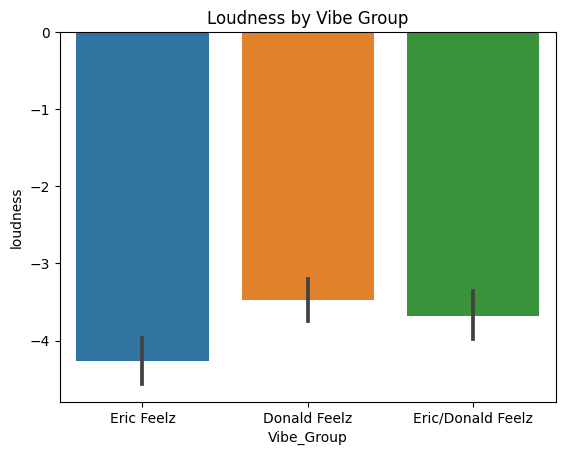


mode
                  sum_sq     df         F    PR(>F)
C(Vibe_Group)   3.546667    2.0  7.412808  0.000722
Residual       71.050000  297.0       NaN       NaN
          Vibe_Group  mode
0       Donald Feelz  0.47
1         Eric Feelz  0.45
2  Eric/Donald Feelz  0.69


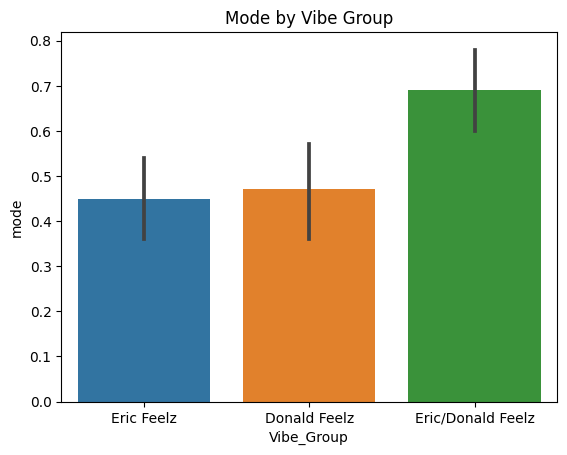


speechiness
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.064772    2.0  6.740876  0.001371
Residual       1.426912  297.0       NaN       NaN
          Vibe_Group  speechiness
0       Donald Feelz     0.099927
1         Eric Feelz     0.116321
2  Eric/Donald Feelz     0.080375


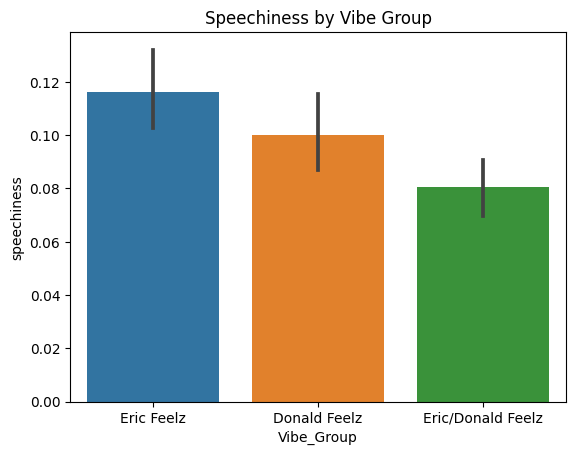


acousticness
                  sum_sq     df          F        PR(>F)
C(Vibe_Group)   1.116198    2.0  15.778931  3.072352e-07
Residual       10.504854  297.0        NaN           NaN
          Vibe_Group  acousticness
0       Donald Feelz      0.101563
1         Eric Feelz      0.191004
2  Eric/Donald Feelz      0.249933


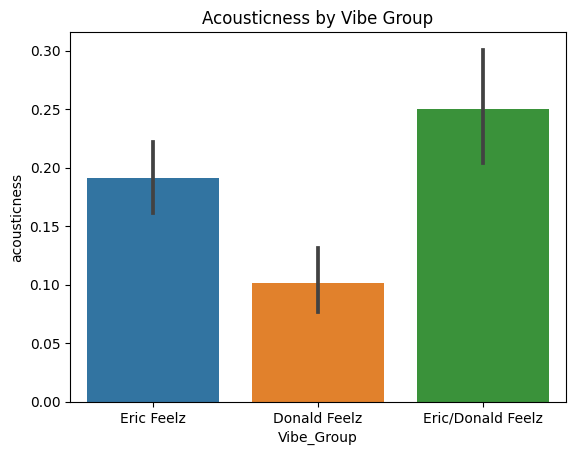


instrumentalness
                 sum_sq     df        F    PR(>F)
C(Vibe_Group)  0.005523    2.0  0.98304  0.375386
Residual       0.834320  297.0      NaN       NaN
          Vibe_Group  instrumentalness
0       Donald Feelz          0.000175
1         Eric Feelz          0.009207
2  Eric/Donald Feelz          0.000037


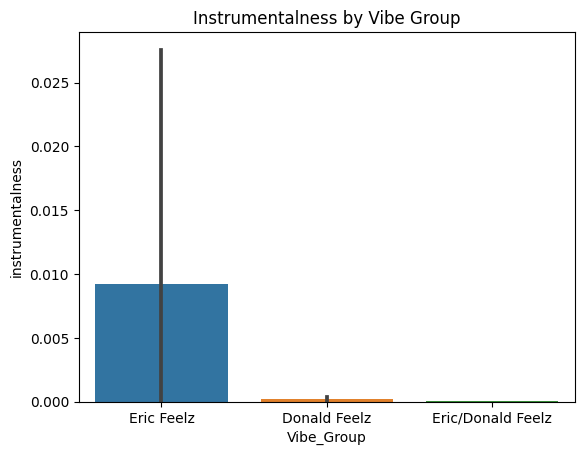


liveness
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.051930    2.0  1.529522  0.218341
Residual       5.041807  297.0       NaN       NaN
          Vibe_Group  liveness
0       Donald Feelz  0.199619
1         Eric Feelz  0.179257
2  Eric/Donald Feelz  0.167805


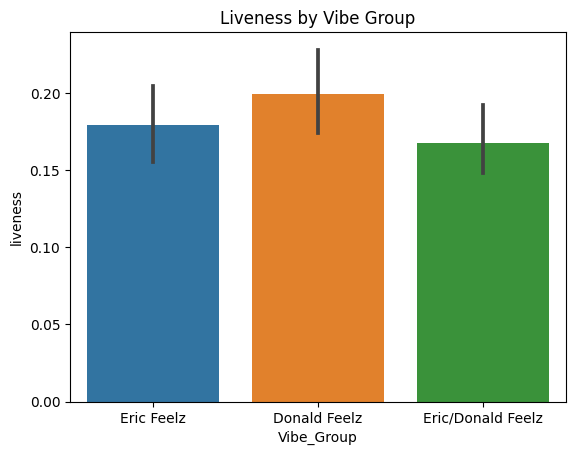


valence
                 sum_sq     df          F        PR(>F)
C(Vibe_Group)  1.914923    2.0  32.748982  1.404286e-13
Residual       8.683205  297.0        NaN           NaN
          Vibe_Group  valence
0       Donald Feelz  0.56455
1         Eric Feelz  0.75717
2  Eric/Donald Feelz  0.63091


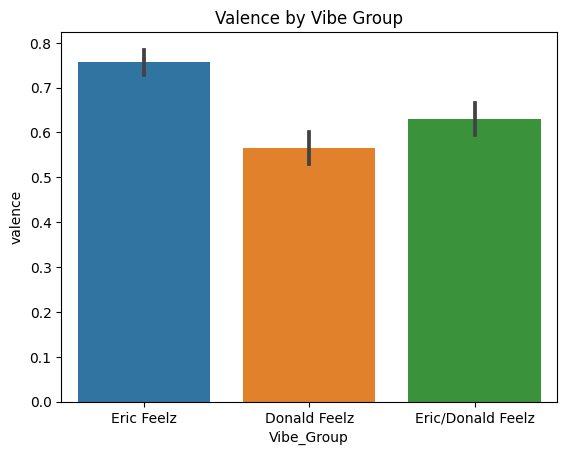


tempo
                     sum_sq     df         F    PR(>F)
C(Vibe_Group)   13451.47048    2.0  9.631555  0.000089
Residual       207395.72075  297.0       NaN       NaN
          Vibe_Group      tempo
0       Donald Feelz  129.09763
1         Eric Feelz  113.38043
2  Eric/Donald Feelz  125.30096


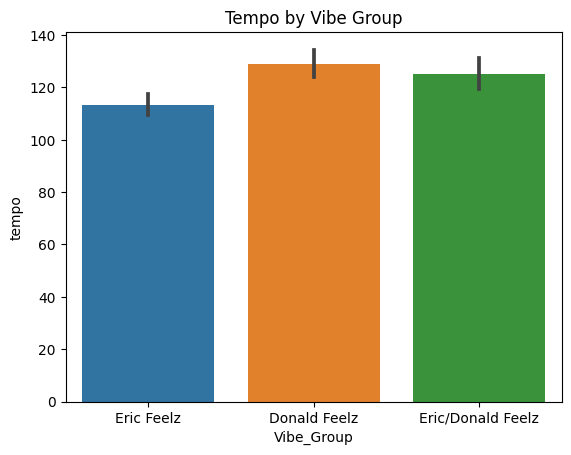


duration_ms
                     sum_sq     df          F    PR(>F)
C(Vibe_Group)  1.029307e+10    2.0  11.436835  0.000016
Residual       1.336489e+11  297.0        NaN       NaN
          Vibe_Group  duration_ms
0       Donald Feelz    198909.30
1         Eric Feelz    204482.08
2  Eric/Donald Feelz    213145.76


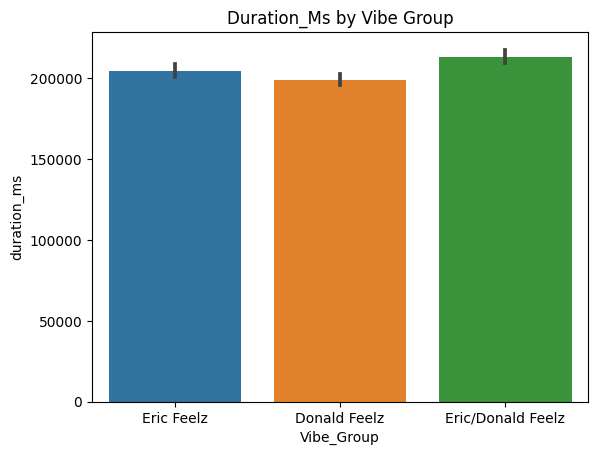


time_signature
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.046667    2.0  1.166667  0.312826
Residual       5.940000  297.0       NaN       NaN
          Vibe_Group  time_signature
0       Donald Feelz            3.99
1         Eric Feelz            4.01
2  Eric/Donald Feelz            3.98


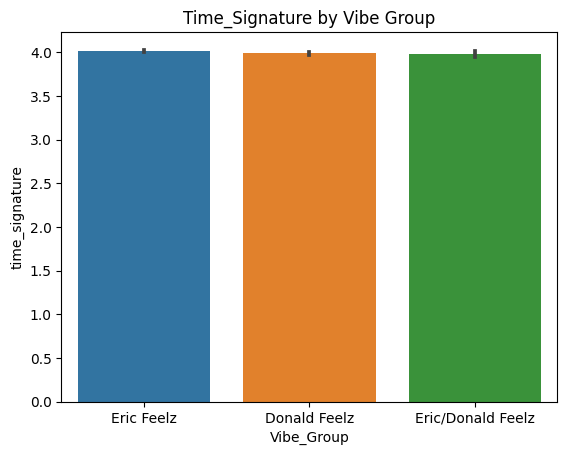


lyric_sentiment_score
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.198946    2.0  9.095327  0.000147
Residual       3.226335  295.0       NaN       NaN
          Vibe_Group  lyric_sentiment_score
0       Donald Feelz               0.093625
1         Eric Feelz               0.129863
2  Eric/Donald Feelz               0.156461


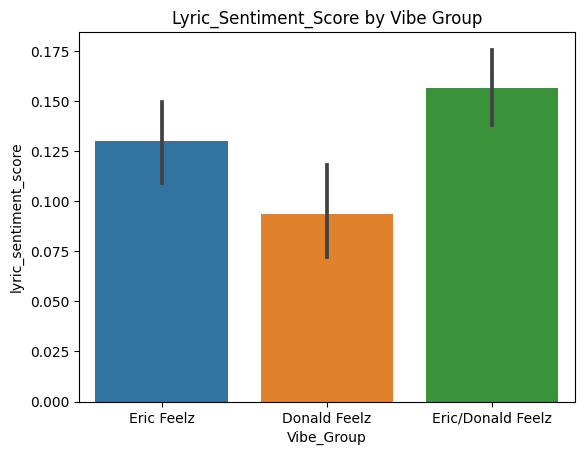


lyric_positive
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.046512    2.0  1.015433  0.363499
Residual       6.802122  297.0       NaN       NaN
          Vibe_Group  lyric_positive
0       Donald Feelz        0.354775
1         Eric Feelz        0.373862
2  Eric/Donald Feelz        0.384921


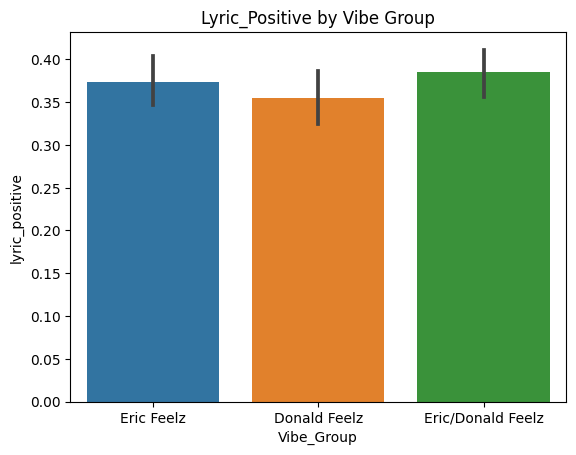


lyric_neutral
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)  0.157532    2.0  3.219671  0.041367
Residual       7.265816  297.0       NaN       NaN
          Vibe_Group  lyric_neutral
0       Donald Feelz       0.469009
1         Eric Feelz       0.504622
2  Eric/Donald Feelz       0.524389


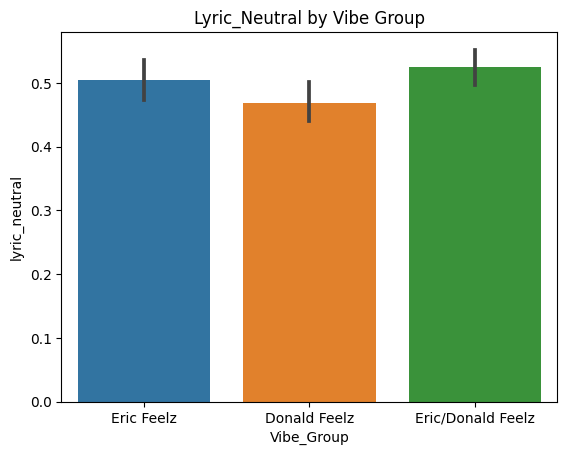


lyric_negative
                 sum_sq     df          F        PR(>F)
C(Vibe_Group)  0.375232    2.0  17.849817  4.781483e-08
Residual       3.121713  297.0        NaN           NaN
          Vibe_Group  lyric_negative
0       Donald Feelz        0.176217
1         Eric Feelz        0.121517
2  Eric/Donald Feelz        0.090691


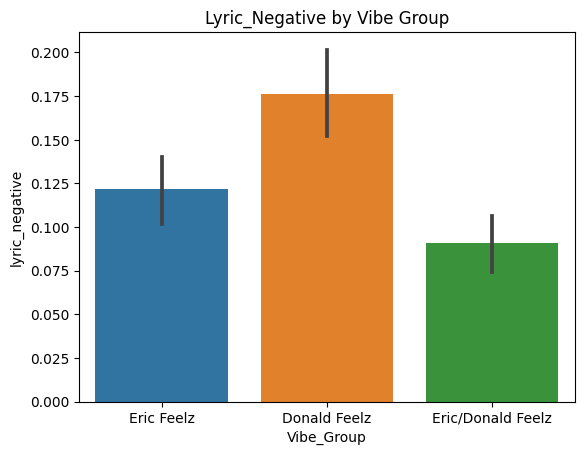


lyric_question
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    92.346667    2.0  3.983883  0.019617
Residual       3442.240000  297.0       NaN       NaN
          Vibe_Group  lyric_question
0       Donald Feelz            2.98
1         Eric Feelz            1.66
2  Eric/Donald Feelz            2.04


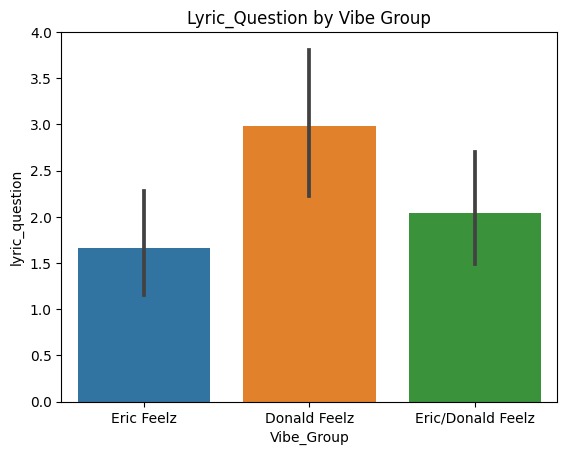


lyric_exclamation
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    15.006667    2.0  1.371665  0.255286
Residual       1624.660000  297.0       NaN       NaN
          Vibe_Group  lyric_exclamation
0       Donald Feelz               1.01
1         Eric Feelz               0.47
2  Eric/Donald Feelz               0.82


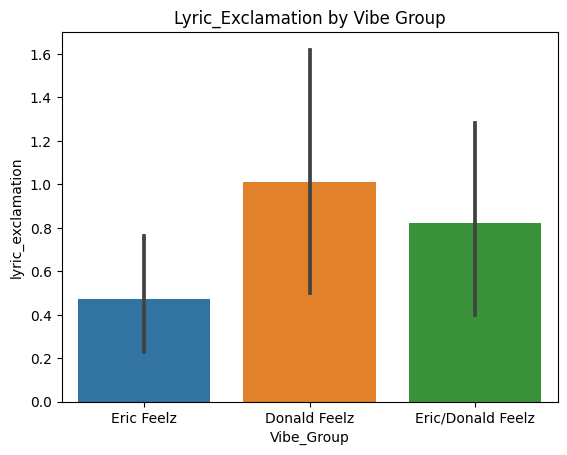


lyric_background_emphasis
                     sum_sq     df         F    PR(>F)
C(Vibe_Group)    857.886667    2.0  5.821573  0.003311
Residual       21883.460000  297.0       NaN       NaN
          Vibe_Group  lyric_background_emphasis
0       Donald Feelz                      10.11
1         Eric Feelz                       5.98
2  Eric/Donald Feelz                       7.77


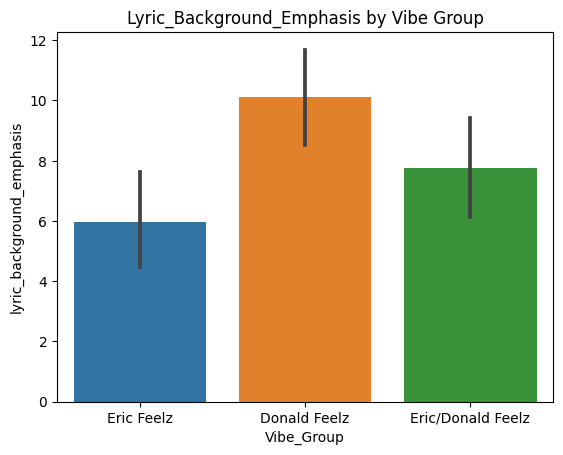


lyric_emphasis
                      sum_sq     df         F    PR(>F)
C(Vibe_Group)    6157.806667    2.0  7.537614  0.000641
Residual       121316.140000  297.0       NaN       NaN
          Vibe_Group  lyric_emphasis
0       Donald Feelz           15.65
1         Eric Feelz            4.56
2  Eric/Donald Feelz            9.75


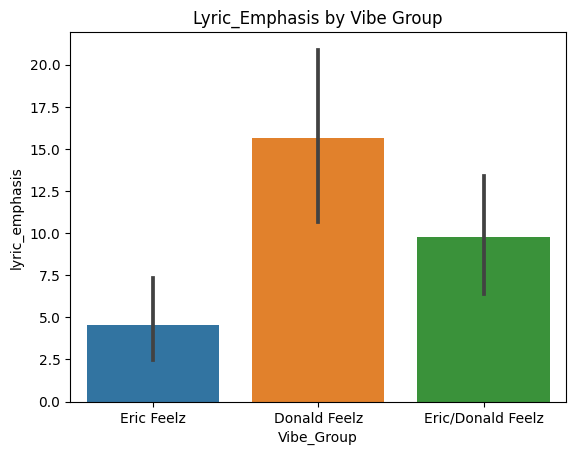


lyric_word_i
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)   1314.96    2.0  9.775524  0.000077
Residual       19975.56  297.0       NaN       NaN
          Vibe_Group  lyric_word_i
0       Donald Feelz         11.00
1         Eric Feelz         15.50
2  Eric/Donald Feelz         11.12


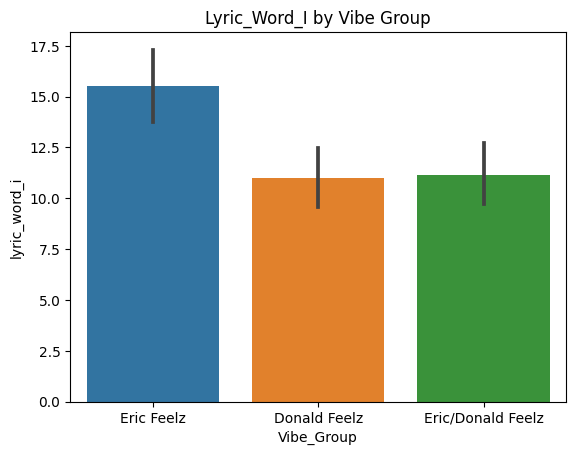


lyric_word_baby
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)   223.166667    2.0  9.043273  0.000154
Residual       3664.630000  297.0       NaN       NaN
          Vibe_Group  lyric_word_baby
0       Donald Feelz             1.07
1         Eric Feelz             2.82
2  Eric/Donald Feelz             0.92


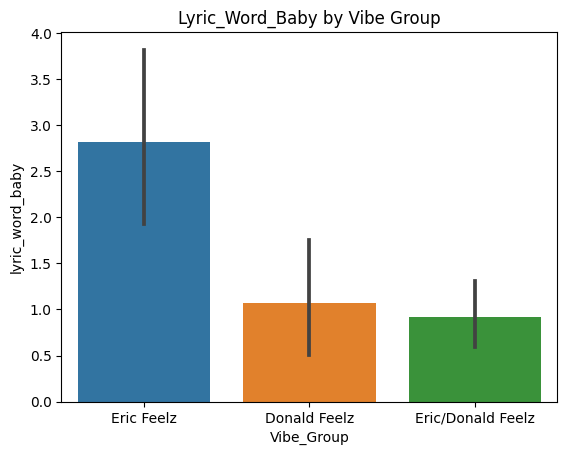


lyric_word_know
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    41.126667    2.0  1.516764  0.221116
Residual       4026.540000  297.0       NaN       NaN
          Vibe_Group  lyric_word_know
0       Donald Feelz             2.08
1         Eric Feelz             2.11
2  Eric/Donald Feelz             1.31


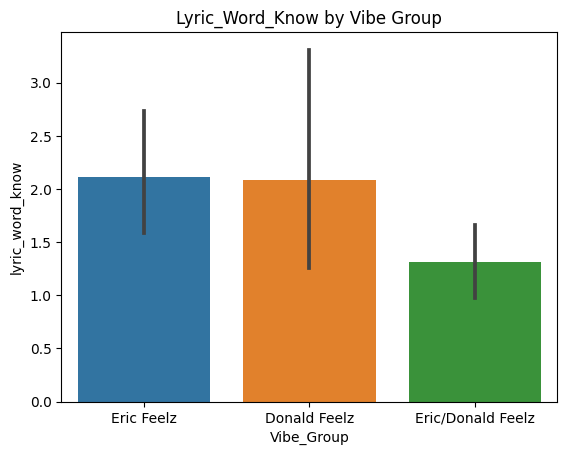


lyric_word_we
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)     8.326667    2.0  0.382458  0.682518
Residual       3233.060000  297.0       NaN       NaN
          Vibe_Group  lyric_word_we
0       Donald Feelz           1.62
1         Eric Feelz           1.75
2  Eric/Donald Feelz           1.35


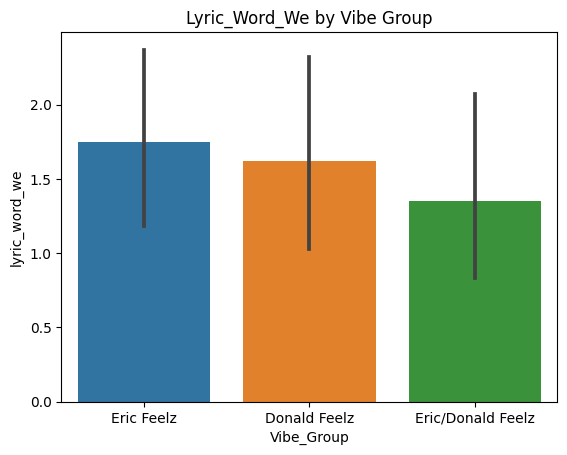


lyric_word_like
                sum_sq     df         F    PR(>F)
C(Vibe_Group)     2.78    2.0  0.102906  0.902243
Residual       4011.70  297.0       NaN       NaN
          Vibe_Group  lyric_word_like
0       Donald Feelz             3.41
1         Eric Feelz             3.18
2  Eric/Donald Feelz             3.25


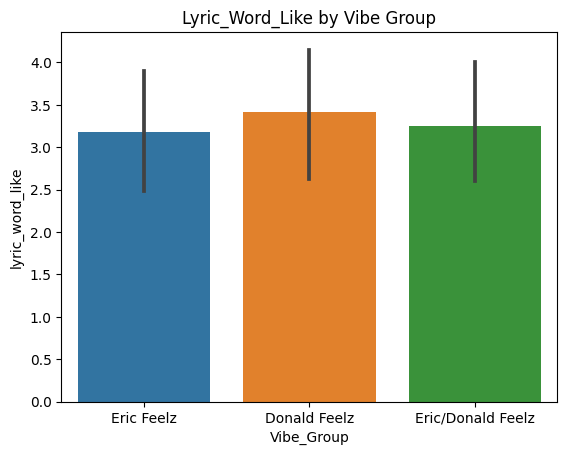


lyric_word_your
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    36.486667    2.0  1.028223  0.358912
Residual       5269.550000  297.0       NaN       NaN
          Vibe_Group  lyric_word_your
0       Donald Feelz             2.70
1         Eric Feelz             3.53
2  Eric/Donald Feelz             2.94


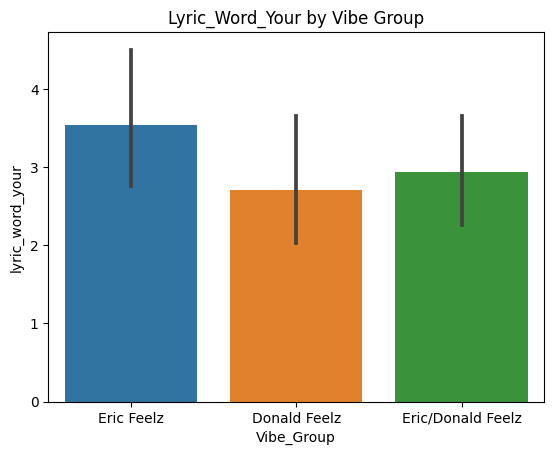


lyric_word_yeah
                     sum_sq     df         F    PR(>F)
C(Vibe_Group)    166.746667    2.0  2.046809  0.130964
Residual       12097.800000  297.0       NaN       NaN
          Vibe_Group  lyric_word_yeah
0       Donald Feelz             3.56
1         Eric Feelz             4.60
2  Eric/Donald Feelz             2.78


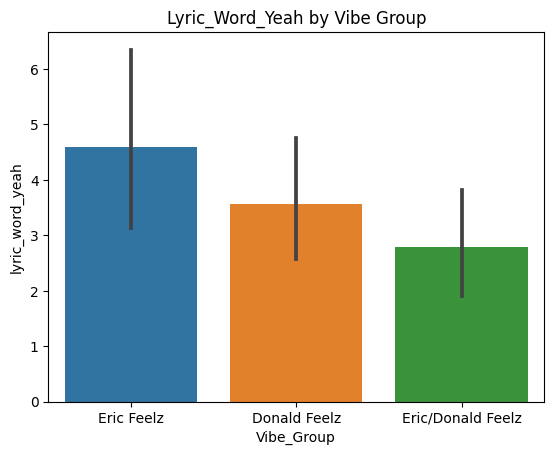


lyric_word_you
                     sum_sq     df        F    PR(>F)
C(Vibe_Group)   1511.006667    2.0  7.16252  0.000916
Residual       31327.590000  297.0      NaN       NaN
          Vibe_Group  lyric_word_you
0       Donald Feelz           13.84
1         Eric Feelz           17.78
2  Eric/Donald Feelz           12.49


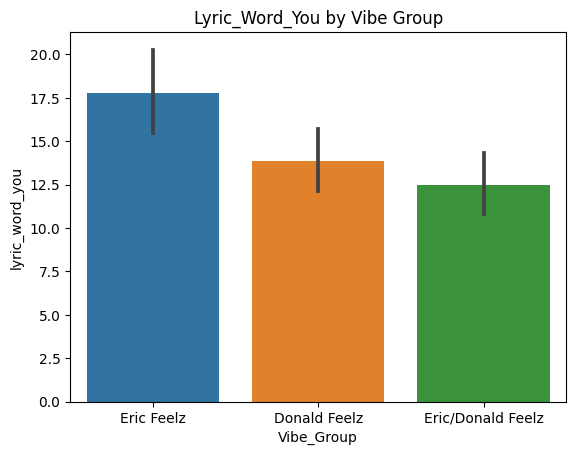


lyric_word_want
                sum_sq     df         F    PR(>F)
C(Vibe_Group)    60.62    2.0  3.121708  0.045532
Residual       2883.70  297.0       NaN       NaN
          Vibe_Group  lyric_word_want
0       Donald Feelz             1.70
1         Eric Feelz             2.77
2  Eric/Donald Feelz             2.01


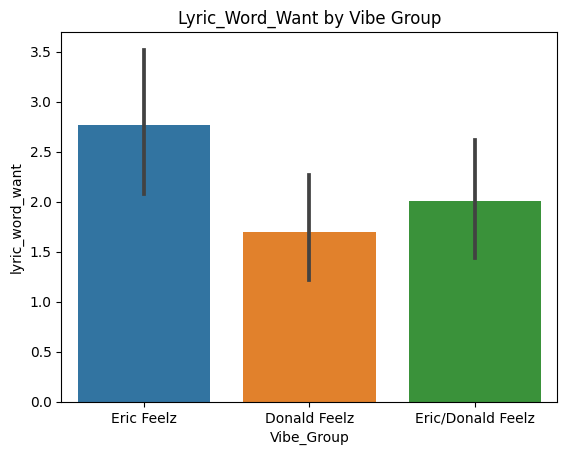


lyric_word_my
                     sum_sq     df         F    PR(>F)
C(Vibe_Group)     84.086667    2.0  1.035743  0.356241
Residual       12055.950000  297.0       NaN       NaN
          Vibe_Group  lyric_word_my
0       Donald Feelz           5.04
1         Eric Feelz           5.80
2  Eric/Donald Feelz           6.33


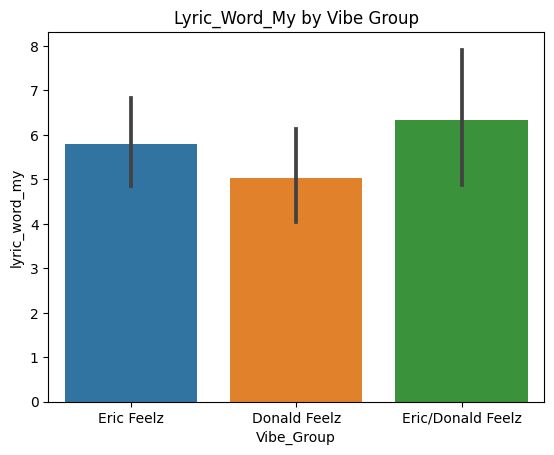


lyric_word_me
                 sum_sq     df         F    PR(>F)
C(Vibe_Group)    442.26    2.0  2.791145  0.062961
Residual       23529.99  297.0       NaN       NaN
          Vibe_Group  lyric_word_me
0       Donald Feelz           8.06
1         Eric Feelz           5.63
2  Eric/Donald Feelz           5.36


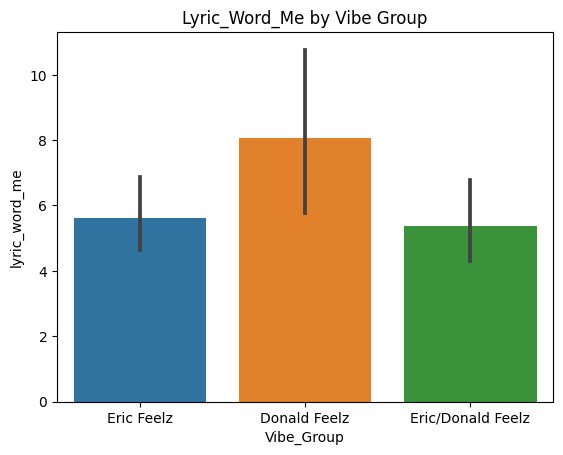


lyric_word_im
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)    82.486667    2.0  2.045243  0.131167
Residual       5989.150000  297.0       NaN       NaN
          Vibe_Group  lyric_word_im
0       Donald Feelz           3.70
1         Eric Feelz           3.37
2  Eric/Donald Feelz           2.46


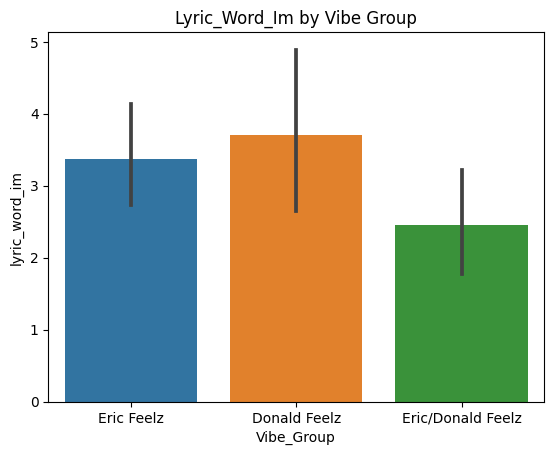


lyric_word_oh
                     sum_sq     df         F    PR(>F)
C(Vibe_Group)    109.626667    2.0  1.035874  0.356195
Residual       15715.770000  297.0       NaN       NaN
          Vibe_Group  lyric_word_oh
0       Donald Feelz           2.97
1         Eric Feelz           3.67
2  Eric/Donald Feelz           4.45


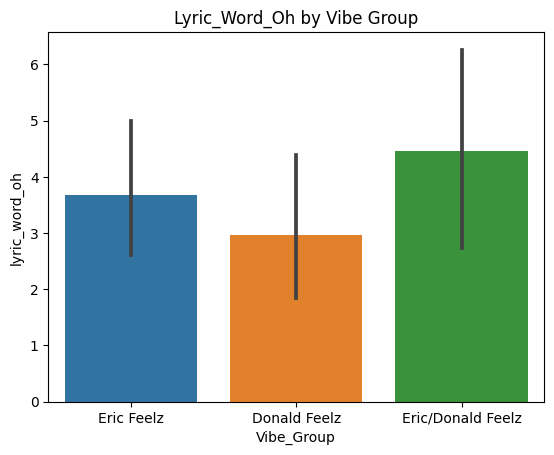


lyric_word_love
                    sum_sq     df         F   PR(>F)
C(Vibe_Group)    11.606667    2.0  0.173098  0.84114
Residual       9957.310000  297.0       NaN      NaN
          Vibe_Group  lyric_word_love
0       Donald Feelz             2.47
1         Eric Feelz             2.42
2  Eric/Donald Feelz             2.86


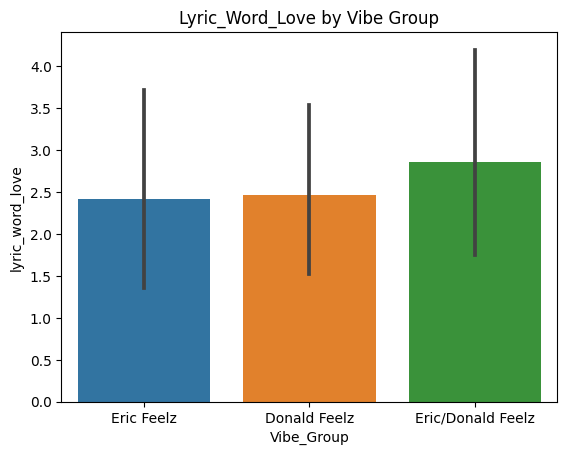


lyric_word_now
                sum_sq     df        F    PR(>F)
C(Vibe_Group)     3.50    2.0  0.18296  0.832895
Residual       2840.78  297.0      NaN       NaN
          Vibe_Group  lyric_word_now
0       Donald Feelz            1.92
1         Eric Feelz            1.87
2  Eric/Donald Feelz            1.67


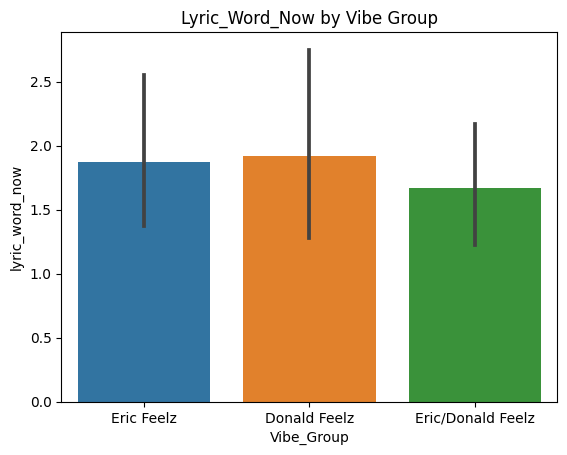


lyric_word_dont
                sum_sq     df         F    PR(>F)
C(Vibe_Group)    69.26    2.0  5.002437  0.007299
Residual       2056.02  297.0       NaN       NaN
          Vibe_Group  lyric_word_dont
0       Donald Feelz             2.51
1         Eric Feelz             2.79
2  Eric/Donald Feelz             1.66


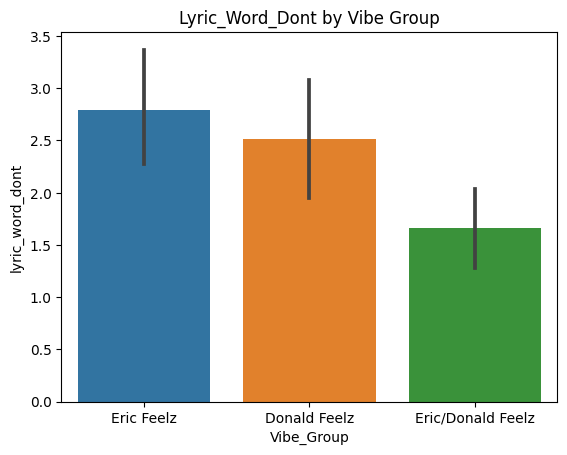


lyric_word_up
                    sum_sq     df        F    PR(>F)
C(Vibe_Group)    22.526667    2.0  1.39482  0.249497
Residual       2398.310000  297.0      NaN       NaN
          Vibe_Group  lyric_word_up
0       Donald Feelz           1.87
1         Eric Feelz           1.50
2  Eric/Donald Feelz           1.20


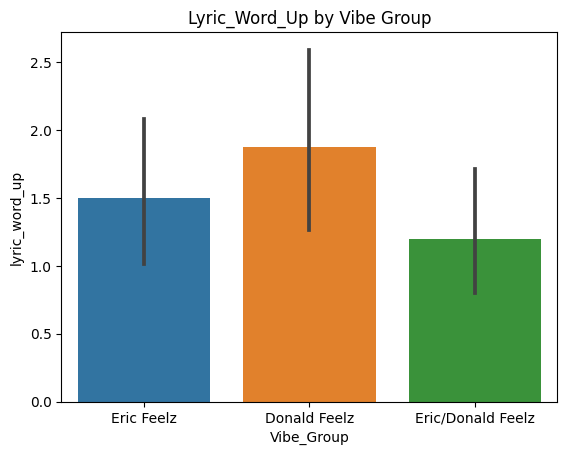


lyric_word_go
                sum_sq     df         F    PR(>F)
C(Vibe_Group)     1.82    2.0  0.113812  0.892464
Residual       2374.70  297.0       NaN       NaN
          Vibe_Group  lyric_word_go
0       Donald Feelz           1.48
1         Eric Feelz           1.65
2  Eric/Donald Feelz           1.49


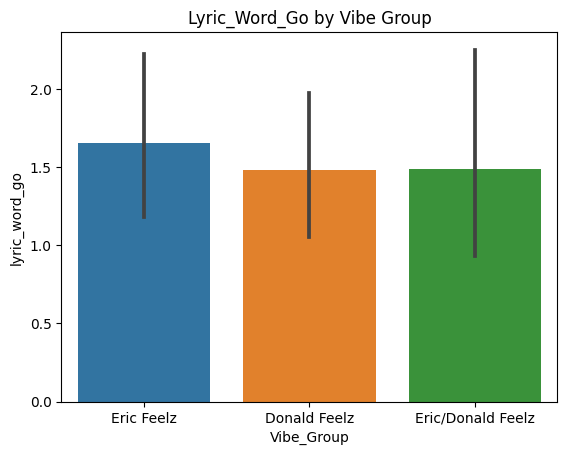


lyric_word_no
                    sum_sq     df         F    PR(>F)
C(Vibe_Group)   113.526667    2.0  5.218332  0.005924
Residual       3230.670000  297.0       NaN       NaN
          Vibe_Group  lyric_word_no
0       Donald Feelz           2.58
1         Eric Feelz           1.50
2  Eric/Donald Feelz           1.13


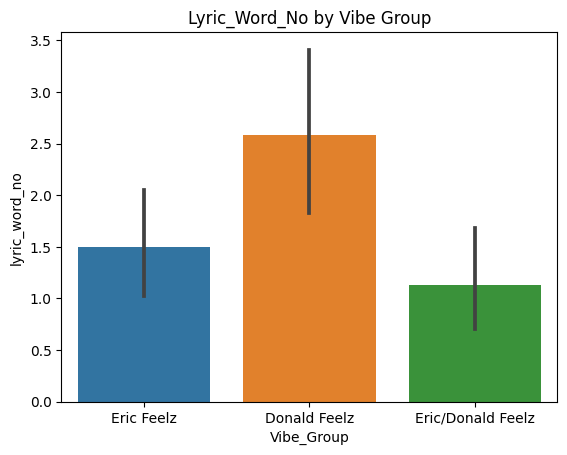


lyric_word_heart
                sum_sq     df         F    PR(>F)
C(Vibe_Group)    65.36    2.0  3.940882  0.020456
Residual       2462.89  297.0       NaN       NaN
          Vibe_Group  lyric_word_heart
0       Donald Feelz              1.37
1         Eric Feelz              1.09
2  Eric/Donald Feelz              2.19


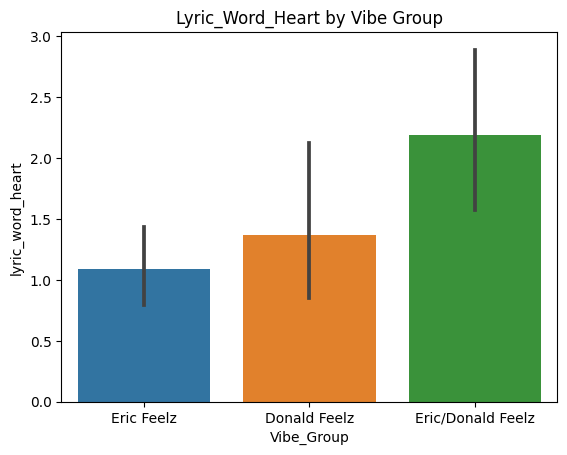

In [7]:
for feature in features:
    print(feature)
    
    model = ols(f"{feature} ~ C(Vibe_Group)", data=spotify_kpop_train_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(aov_table)
    
    feature_by_vibegroup = spotify_kpop_train_df.groupby('Vibe_Group')[feature].mean().reset_index()
    print(feature_by_vibegroup)
    
    sns.barplot(x = 'Vibe_Group', y = feature, data = spotify_kpop_train_df).set(title = f"{feature.title()} by Vibe Group")
    plt.show()
    
    print('')

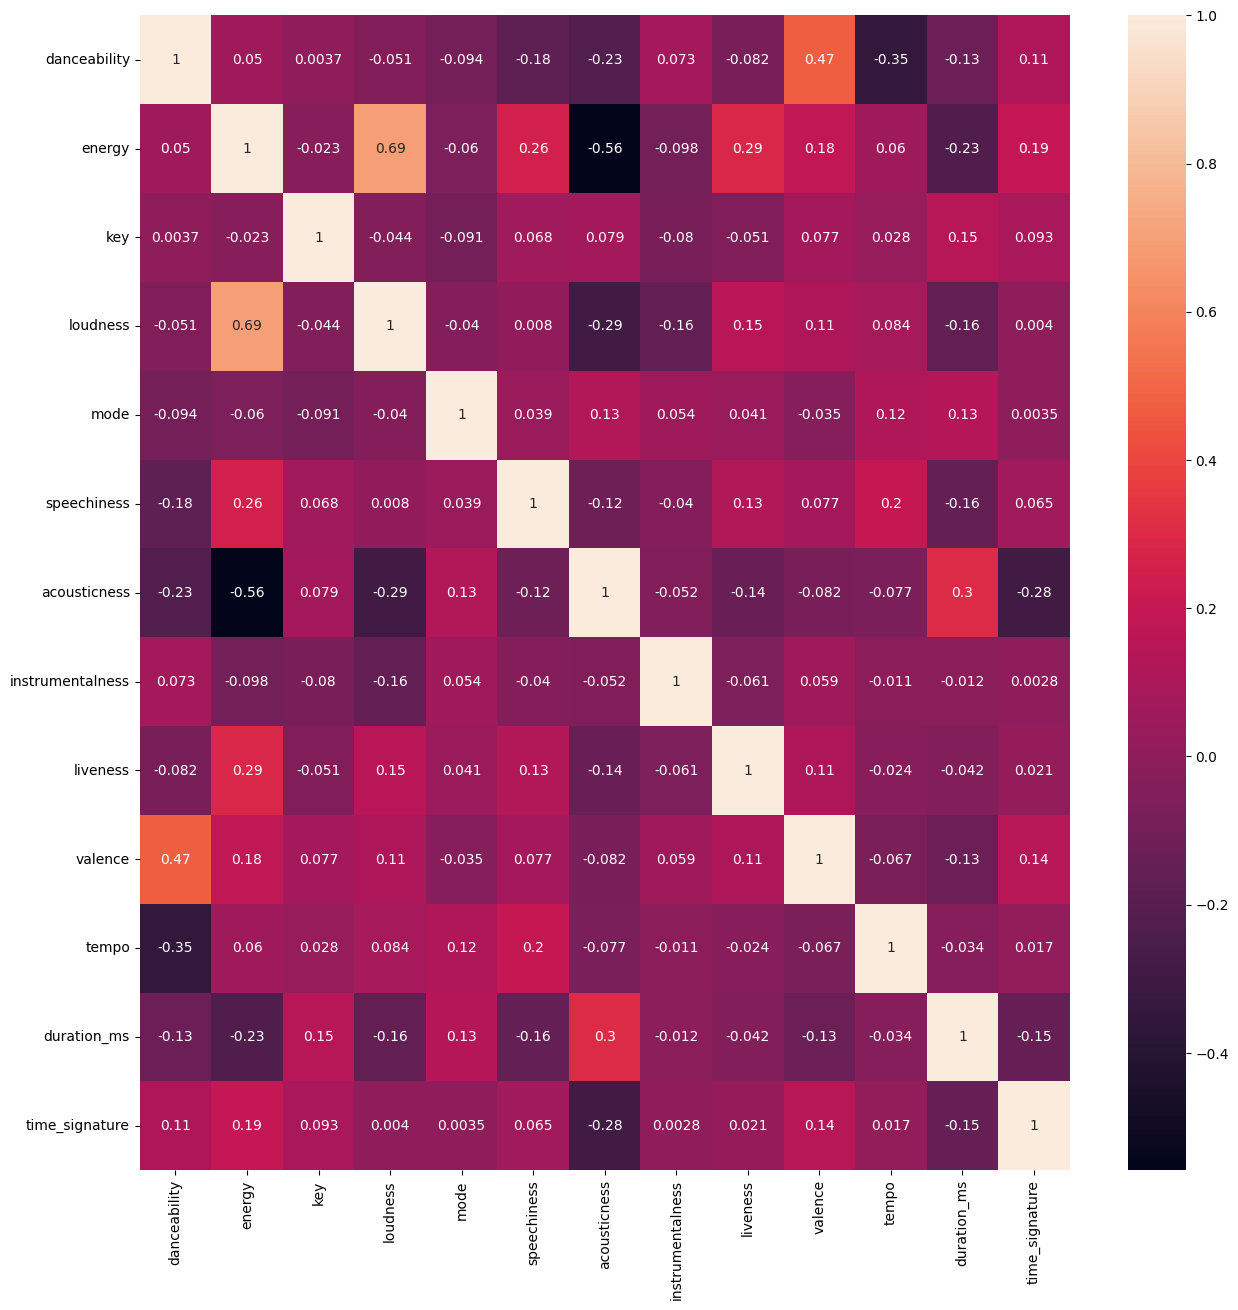

In [12]:
plt.figure(figsize=(15,15))
corr_matrix = spotify_kpop_train_df[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

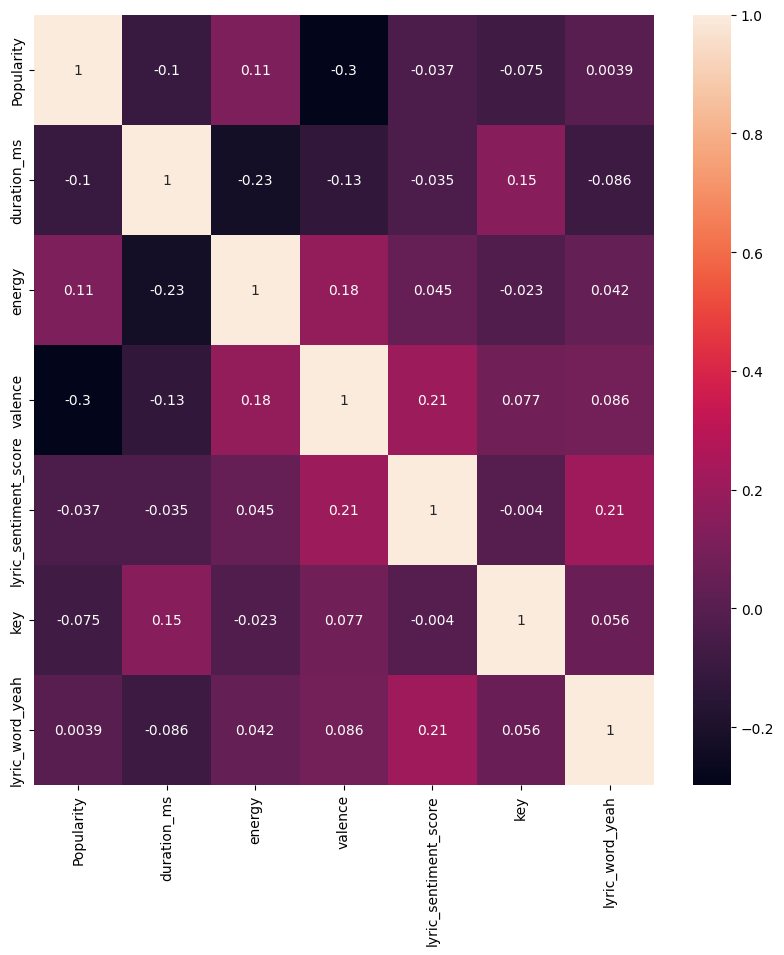

In [20]:
plt.figure(figsize=(10,10))
corr_matrix = spotify_kpop_train_df[['Popularity', 'duration_ms', 'energy', 'valence', 'lyric_sentiment_score',
                                    'key', 'lyric_word_yeah']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()